# INITIALIZATION

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [510]:
# Import the data
df = pd.read_table('Assignment2.data')
df

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


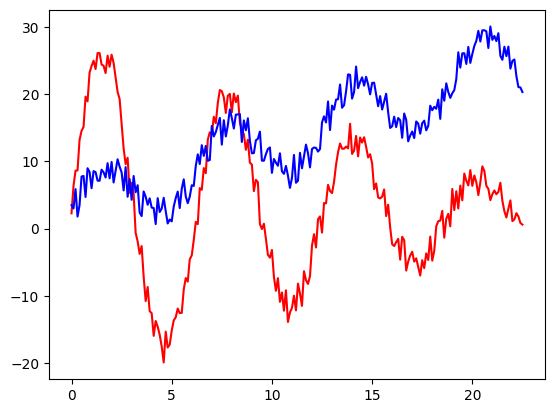

In [511]:
# Initialising variables
y1 = np.array(df['SpringPos'])
y2 = np.array(df['StockPrice'])
x = np.array(range(len(y1)))/10 ## 
plt.plot(x,y1,color='red')
plt.plot(x,y2,color='blue')

# TASK 1 

## OLS CLOSED FORM SOLUTION

In [512]:
m1 = np.sum(x*y2) / np.sum(x**2)
SSE_1 = np.sum((y2 - m1*x)**2)
print(m1,SSE_1)

1.1899412514961836 3850.3354330802345


## LINEAR SEARCH

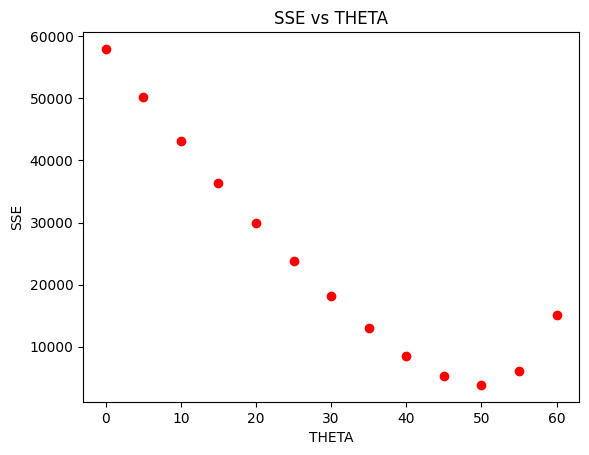

1.19175359259421 3850.4609771279092


In [513]:
m2_list = []
SSE_list = []
for i in range(0,61,5):
    m = np.tan(i*np.pi/180)
    m2_list.append(m)
    SSE_list.append(np.sum((y2 - m*x)**2))
plt.plot(range(0,61,5),SSE_list,'ro')
plt.xlabel('THETA')
plt.ylabel('SSE')
plt.title('SSE vs THETA')
plt.show()
SSE_2 = min(SSE_list)
min_index = SSE_list.index(SSE_2)
m2 = m2_list[min_index]
print(m2,SSE_2)

## SOLUTION FROM SKLEARN

In [514]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
lr.fit(x.reshape(-1,1),y2)
m3 = lr.coef_
print(m3[0])
SSE_3 = np.sum((y2 - m3[0]*x)**2)

1.1899412514961836


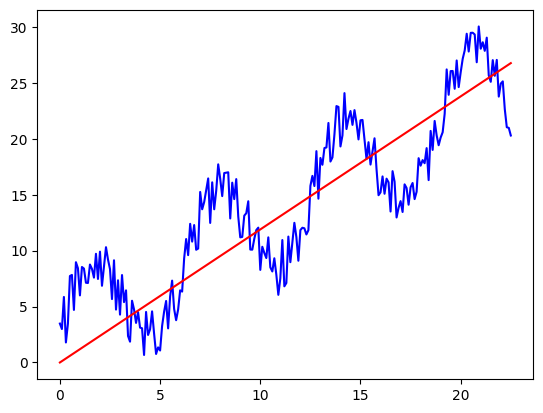

In [515]:
plt.plot(x,y2,color='blue')
plt.plot(x,m1*x,color='red')

In [516]:
print(m1, SSE_1)
print(m2, SSE_2)
print(m3[0], SSE_3)

1.1899412514961836 3850.3354330802345
1.19175359259421 3850.4609771279092
1.1899412514961836 3850.3354330802345


We can see that the OLS solution and solution from using the Linear regression library from sklearn are same. However the slope found from linear search has a slighly higher SSE corresponding to it. This is because we have done the linear search in steps of 5 degrees. 

# TASK 2

In [517]:
x2 = np.array(np.sin(x))
x = pd.DataFrame({'bias':np.ones(len(x)), 'x':x, 'x2':x2})
y = pd.DataFrame({'y':y2})
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## LINEAR REGRESSION AFTER FEATURE TRANSFORMATION

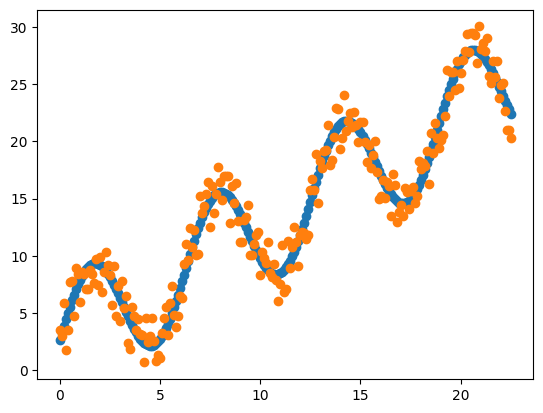

2.0891565491737474


In [518]:
mdl = LinearRegression(fit_intercept=False)
mdl.fit(x, y)

y_pred = mdl.predict(x)
plt.scatter(x['x'], y_pred)
plt.scatter(x['x'], y)
plt.show()

SSE = mean_squared_error(y, y_pred)
print(SSE)

## INTERPOLATION

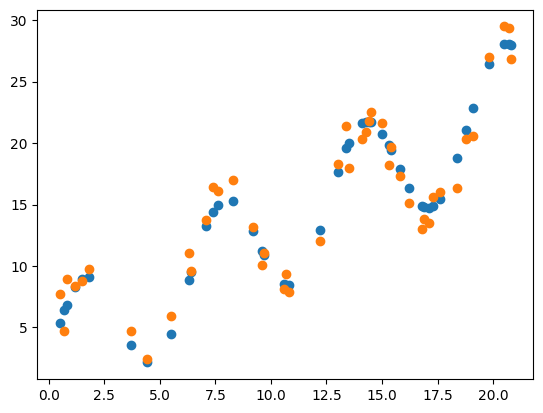

1.6301224131541563


In [519]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

mdl_1 = LinearRegression(fit_intercept=False)
mdl_1.fit(x_train, y_train)

y_pred = mdl_1.predict(x_test)
plt.scatter(x_test['x'], y_pred)
plt.scatter(x_test['x'], y_test)
plt.show()

SSE_interpolation = mean_squared_error(y_test, y_pred)
print(SSE_interpolation)

## EXTRAPOLATION 

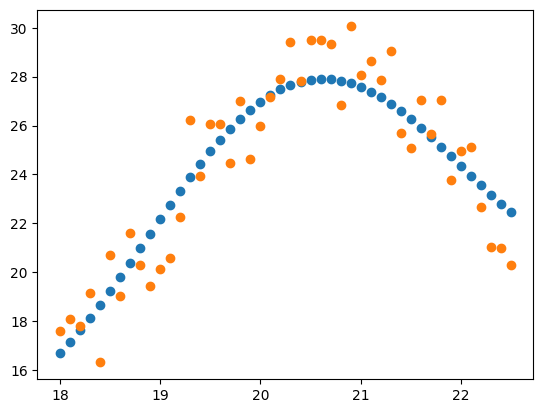

1.948062168608876


In [520]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

mdl_2 = LinearRegression(fit_intercept=False)
mdl_2.fit(x_train, y_train)

y_pred = mdl_2.predict(x_test)
plt.scatter(x_test['x'], y_pred)
plt.scatter(x_test['x'], y_test)
plt.show()

SSE_extrapolation = mean_squared_error(y_test, y_pred)
print(SSE_extrapolation)

# TASK 3

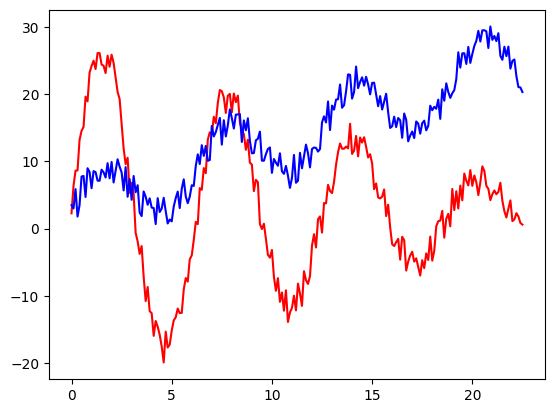

In [521]:
df = pd.read_table('Assignment2.data')
y1 = np.array(df['SpringPos'])
y2 = np.array(df['StockPrice'])
x = np.array(range(len(y1)))/10 ## 
plt.plot(x,y1,color='red')
plt.plot(x,y2,color='blue')

In [522]:
x2 = np.array(np.sin(x))
x3 = np.array(x*np.sin(x))
x = pd.DataFrame({'bias':np.ones(len(x)), 'x':x, 'x2':x2, 'x3':x3})
y = pd.DataFrame({'y':y1})
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

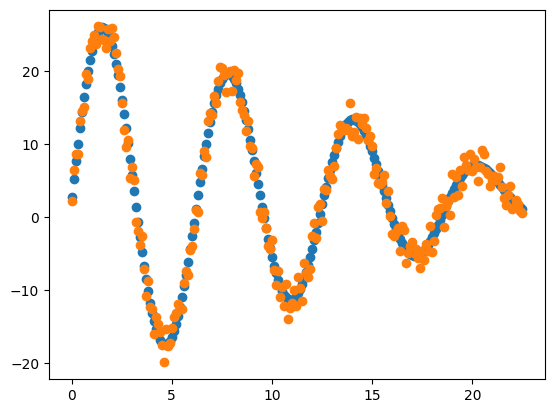

[[ 2.75411036e+00 -1.61146451e-02  2.47903127e+01 -9.89227560e-01]]
2.0455871412910187


In [523]:
mdl = LinearRegression(fit_intercept=False)
mdl.fit(x, y)
y_pred = mdl.predict(x)
plt.scatter(x['x'], y_pred)
plt.scatter(x['x'], y)
plt.show()
print(mdl.coef_)
SSE = mean_squared_error(y, y_pred)
print(SSE)

## INTERPOLATION

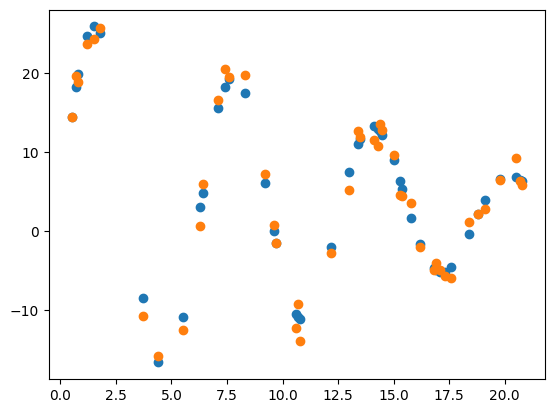

1.9052541808032584


In [524]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

mdl_1 = LinearRegression(fit_intercept=False)
mdl_1.fit(x_train, y_train)

y_pred = mdl_1.predict(x_test)
plt.scatter(x_test['x'], y_pred)
plt.scatter(x_test['x'], y_test)
plt.show()

SSE_interpolation = mean_squared_error(y_test, y_pred)
print(SSE_interpolation)

## EXTRAPOLATION

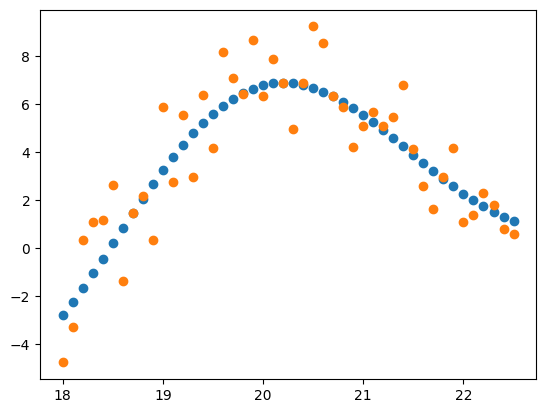

2.0271582425481456


In [525]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

mdl_2 = LinearRegression(fit_intercept=False)
mdl_2.fit(x_train, y_train)

y_pred = mdl_2.predict(x_test)
plt.scatter(x_test['x'], y_pred)
plt.scatter(x_test['x'], y_test)
plt.show()

SSE_extrapolation = mean_squared_error(y_test, y_pred)
print(SSE_extrapolation)